In [1]:
import pandas as pd

In [2]:
import os
frames = []
for season in os.listdir('dataset'):
    if season == '.ipynb_checkpoints': continue
    season_df = pd.read_csv(f'dataset/{season}')
    frames.append(season_df)
df = pd.concat(frames)
df

,Date,Home,Home Pace,Home eFG%,Home TOV%,Home ORB%,Home FT/FGA,Home ORtg,Home PTS,Home MP,...,Visitor C TotalPoss,Visitor C PProd_FG_Part,Visitor C PProd_AST_Part,Visitor C PProd_ORB_Part,Visitor C PProd,Visitor C Floor,Visitor C MarginalOffense,Visitor C MarginalPPW,Visitor C OffWS,Winner
0,2017-10-17,CLE,99.30,0.488000,15.300,0.196000,0.25300,102.700,102.000000,235.00,...,21.458366,3.674384,2.621641e+00,7.038291e-09,10.573255,0.335198,3.406642,34.652126,0.098310,1
1,2017-10-17,GSW,102.00,0.638000,16.000,0.154000,0.23800,118.600,121.000000,234.00,...,20.039184,9.069338,6.594477e-09,7.851671e-01,9.270821,0.229019,4.698183,35.594329,0.131992,0
2,2017-10-18,BOS,99.30,0.455000,9.200,0.180000,0.21600,99.700,99.000000,236.00,...,18.290697,3.101912,1.171359e+00,8.726943e-09,5.017607,0.168976,1.938160,34.163577,0.056732,0
3,2017-10-18,DAL,98.60,0.541000,13.600,0.200000,0.20900,112.600,111.000000,235.00,...,25.788923,15.641886,1.730716e+00,6.989772e-09,17.752311,0.312765,9.715788,34.407852,0.282371,0
4,2017-10-18,DET,98.50,0.474000,7.300,0.170000,0.11500,103.600,102.000000,236.00,...,26.564078,8.279328,5.288086e-01,7.903826e-01,9.366459,0.191105,4.308420,34.372955,0.125343,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2017-06-01,GSW,101.85,0.616250,15.975,0.243750,0.23025,122.225,124.500000,232.75,...,19.504262,5.149828,7.112664e-01,2.593930e+00,12.524946,0.311964,6.225564,32.725845,0.192945,1
1305,2017-06-04,GSW,103.00,0.599250,12.675,0.197750,0.18225,120.850,124.500000,232.50,...,20.227666,4.291524,7.614301e-01,2.379108e+00,10.811566,0.272471,5.265094,33.058524,0.163009,1
1306,2017-06-07,CLE,97.15,0.581333,12.650,0.224167,0.23050,118.500,114.833333,235.00,...,18.976162,2.637445,1.535517e+00,1.720786e-01,4.331833,0.143946,1.796074,36.283533,0.049637,0
1307,2017-06-09,CLE,97.50,0.553833,12.550,0.220833,0.24000,115.200,112.000000,235.50,...,19.126919,2.680621,1.228414e+00,1.376629e-01,4.195328,0.132693,1.821991,36.020065,0.050724,1


In [3]:
X = df.drop('Winner', axis=1)
y = df.Winner

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=42)
X_validation.to_csv('model_evaluation/X_val.csv')
y_validation.to_csv('model_evaluation/y_val.csv')
X_train = X_train.drop('Date', axis=1).drop('Home', axis=1).drop('Visitor', axis=1)

In [26]:
from catboost import CatBoostClassifier, Pool, EShapCalcType, EFeaturesSelectionAlgorithm
from sklearn.metrics import accuracy_score

In [24]:
train_pool = Pool(X_train, y_train, feature_names=list(X_train.columns))
test_pool = Pool(X_validation.drop(['Date', 'Home', 'Visitor'], axis=1), y_validation, feature_names=list(X_train.columns))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

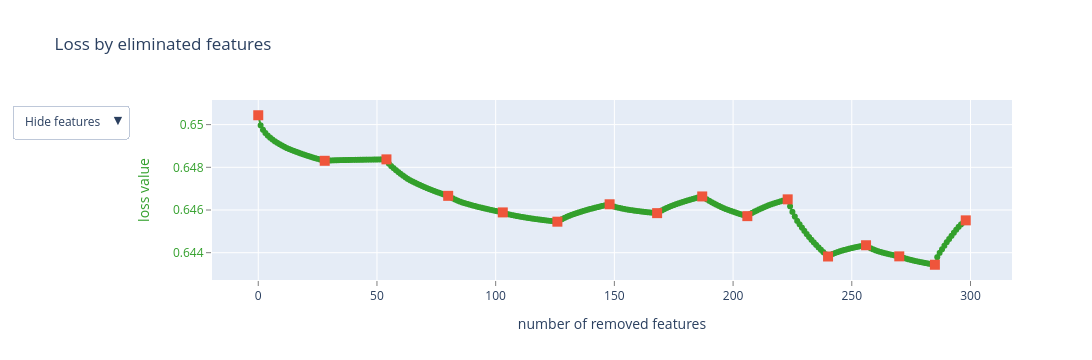

In [40]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
             'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
             }
model = CatBoostClassifier()
grid = GridSearchCV(estimator=CBC

In [81]:
import joblib
joblib.dump(Grid_CBC, 'model.pkl')

['model.pkl']

In [ ]:
dict(zip([X_train.columns, model.get_feature_importance()]))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [16]:
features = dict()
for i in range(len(X_train.columns)):
    features[X_train.columns[i]] = Grid_CBC.best_estimator_.get_feature_importance()[i]

In [19]:
Grid_CBC.best_params_

{'depth': 6, 'iterations': 90, 'learning_rate': 0.04}

In [ ]:
sorted_features = sorted(features.items(), key=lambda x:x[1])[::-1]
sorted_features